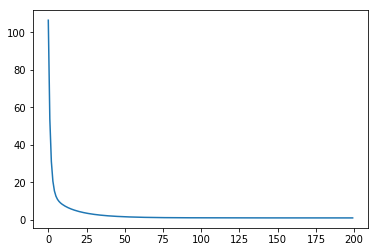

(199, 1.0025917710613823, array([[0.        ],
       [0.02775595],
       [0.02920529],
       [0.9688804 ]]))


In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

# N is batch size(sample size); D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 4, 2, 30, 1

# Create random input and output data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1],[0],[0],[1]])

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 0.002
loss_col = []
for t in range(200):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)  # using ReLU as activate function
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum() # loss function
    loss_col.append(loss)
    

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) # the last layer's error
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T) # the second laye's error 
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # the derivate of ReLU
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

plt.plot(loss_col)
plt.show()

print(t, loss, y_pred)